# Water Potability Prediction Using SEMMA Methodology

# Loading Dataset

*   Mount drive and load the dataset the dataset using Pandas library.
*   Dataset used for analysis is Kaggle's Water Patability dataset - https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/DM-Assignment-Dataset/water_potability.csv'
water_data = pd.read_csv(file_path)

# Display the basic information about the dataset
water_data.info()

# Display the first few rows of the dataset
water_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Exploring The Dataset

In [ ]:
water_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


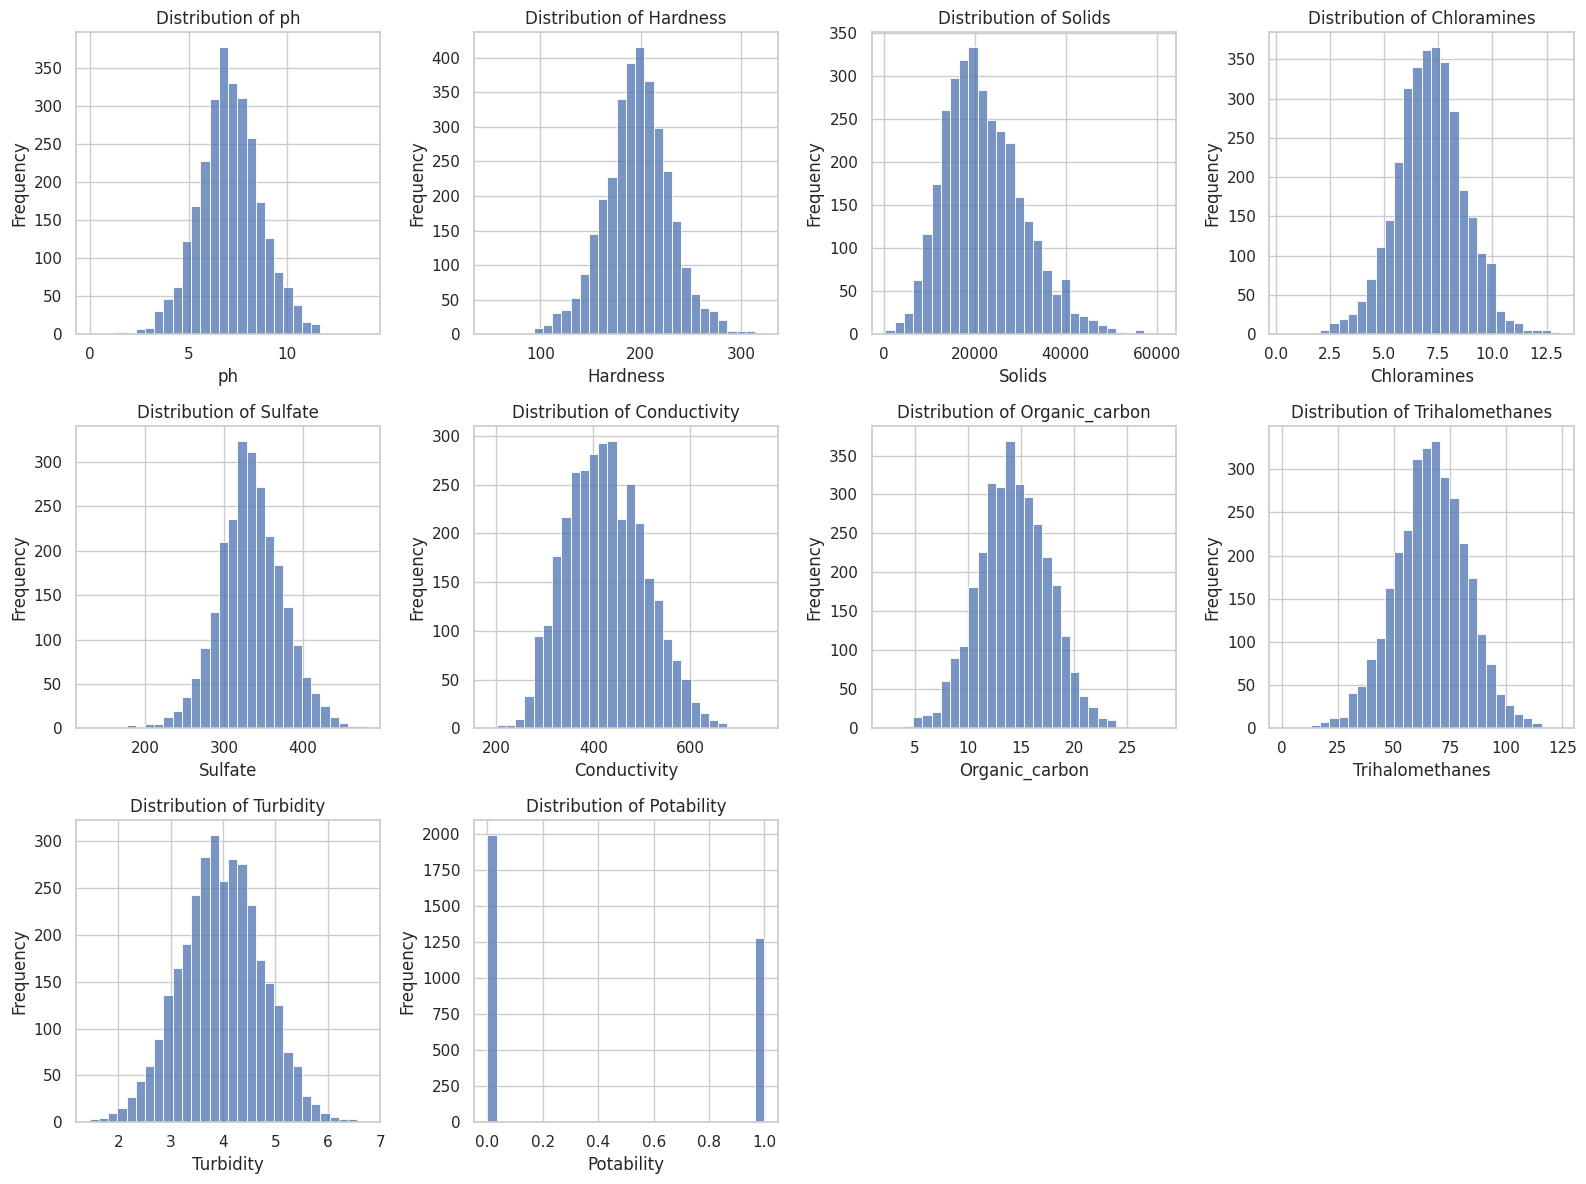

Sulfate            781
ph                 491
Trihalomethanes    162
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(16, 12))

# Loop over the columns to create subplots for each variable
for i, column in enumerate(water_data.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(water_data[column], kde=False, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

# Display the number of missing values in each column
missing_values = water_data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values


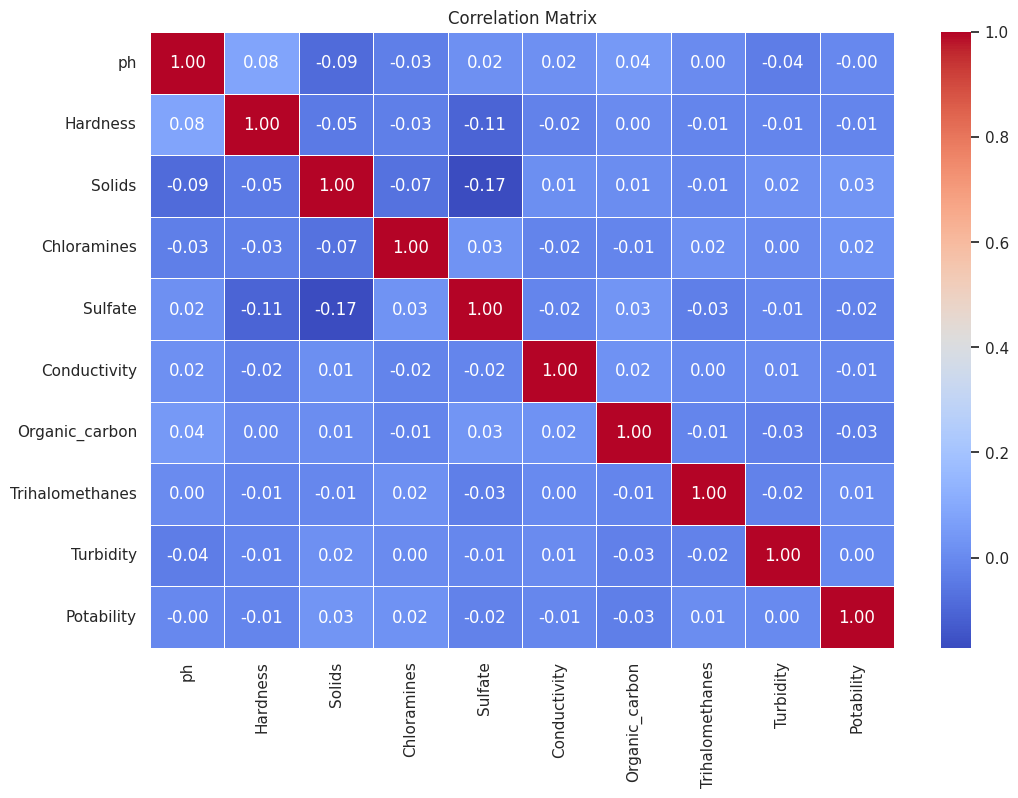

In [ ]:
# Calculate the correlation matrix
correlation_matrix = water_data.corr()

# Initialize the figure
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


# Modify

In [ ]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with a strategy to replace missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the columns with missing values
water_data[['ph', 'Sulfate', 'Trihalomethanes']] = imputer.fit_transform(water_data[['ph', 'Sulfate', 'Trihalomethanes']])

# Verify if there are any missing values left in the dataset
missing_values_after_imputation = water_data.isnull().sum().sum()
missing_values_after_imputation


0

## Handling The Missing Values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the features and the target
X = water_data.drop('Potability', axis=1)
y = water_data['Potability']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display the first few rows of the scaled features
X_scaled.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327


## Feature Scaling

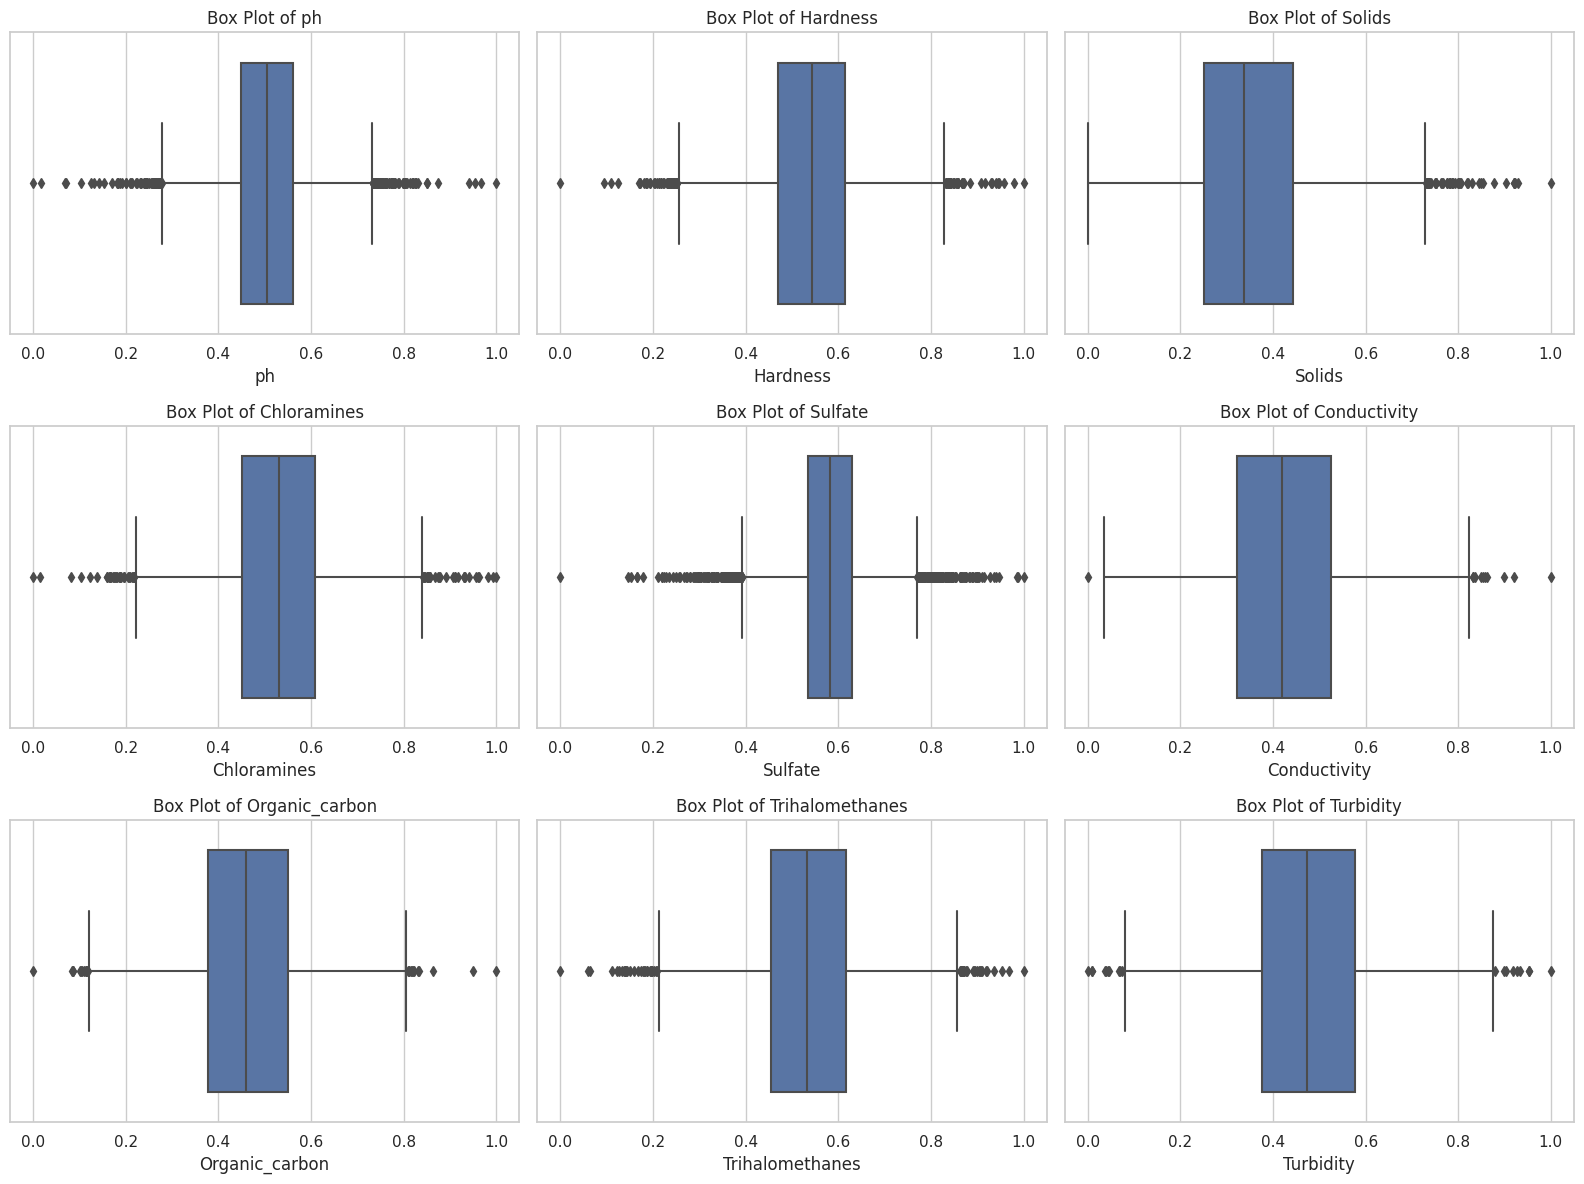

In [ ]:
# Initialize the figure
plt.figure(figsize=(16, 12))

# Loop over the columns to create subplots for each variable
for i, column in enumerate(X_scaled.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=X_scaled[column])
    plt.title(f'Box Plot of {column}')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


## Modeling

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the training and testing sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((2620, 9), (656, 9), (2620,), (656,))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model on the training data
log_reg_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_log_reg = log_reg_model.predict(X_test)

# Calculate the accuracy of the Logistic Regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Display the classification report and confusion matrix for Logistic Regression model
classification_report_log_reg = classification_report(y_test, y_pred_log_reg)
confusion_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

(accuracy_log_reg, classification_report_log_reg, confusion_matrix_log_reg)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.6097560975609756,
 '              precision    recall  f1-score   support\n\n           0       0.61      1.00      0.76       400\n           1       0.00      0.00      0.00       256\n\n    accuracy                           0.61       656\n   macro avg       0.30      0.50      0.38       656\nweighted avg       0.37      0.61      0.46       656\n',
 array([[400,   0],
        [256,   0]]))

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier model on the training data
dt_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_dt = dt_model.predict(X_test)

# Calculate the accuracy of the Decision Tree Classifier model
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Display the classification report and confusion matrix for Decision Tree Classifier model
classification_report_dt = classification_report(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

(accuracy_dt, classification_report_dt, confusion_matrix_dt)


(0.6036585365853658,
 '              precision    recall  f1-score   support\n\n           0       0.67      0.70      0.68       400\n           1       0.49      0.45      0.47       256\n\n    accuracy                           0.60       656\n   macro avg       0.58      0.58      0.58       656\nweighted avg       0.60      0.60      0.60       656\n',
 array([[282, 118],
        [142, 114]]))

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier model with n_jobs set to 1
rf_model = RandomForestClassifier(random_state=42, n_jobs=1)

# Train the Random Forest Classifier model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy of the Random Forest Classifier model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Display the classification report and confusion matrix for Random Forest Classifier model
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

(accuracy_rf, classification_report_rf, confusion_matrix_rf)


(0.6554878048780488,
 '              precision    recall  f1-score   support\n\n           0       0.67      0.88      0.76       400\n           1       0.62      0.31      0.41       256\n\n    accuracy                           0.66       656\n   macro avg       0.64      0.59      0.59       656\nweighted avg       0.65      0.66      0.62       656\n',
 array([[350,  50],
        [176,  80]]))

## Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier model
svc_model = SVC(random_state=42)

# Train the Support Vector Classifier model on the training data
svc_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_svc = svc_model.predict(X_test)

# Calculate the accuracy of the Support Vector Classifier model
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Display the classification report and confusion matrix for Support Vector Classifier model
classification_report_svc = classification_report(y_test, y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)

(accuracy_svc, classification_report_svc, confusion_matrix_svc)


(0.6615853658536586,
 '              precision    recall  f1-score   support\n\n           0       0.66      0.94      0.77       400\n           1       0.71      0.23      0.34       256\n\n    accuracy                           0.66       656\n   macro avg       0.68      0.58      0.56       656\nweighted avg       0.68      0.66      0.60       656\n',
 array([[376,  24],
        [198,  58]]))

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting Classifier model on the training data
gb_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_gb = gb_model.predict(X_test)

# Calculate the accuracy of the Gradient Boosting Classifier model
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Display the classification report and confusion matrix for Gradient Boosting Classifier model
classification_report_gb = classification_report(y_test, y_pred_gb)
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)

(accuracy_gb, classification_report_gb, confusion_matrix_gb)


(0.6585365853658537,
 '              precision    recall  f1-score   support\n\n           0       0.66      0.91      0.76       400\n           1       0.65      0.27      0.38       256\n\n    accuracy                           0.66       656\n   macro avg       0.66      0.59      0.57       656\nweighted avg       0.66      0.66      0.61       656\n',
 array([[364,  36],
        [188,  68]]))

# Exporting The Model

In [ ]:
import joblib
joblib.dump(svc_model, 'final_svc_model.pkl')